# Assignment 1: Numerical Differentiation
## PHYS481 - Computational Physics II
### Max Stronge (30064749)


## Introduction

Introduce the assignment here. What are you trying to do and why? This can be brief (a few sentences).

**Rubric:**
- 2 points total for the introduction.
- Completely missing: 0 points
- Inadequate/problematic: 1 point (eg. “In this assignment I answered the questions”)


## Question 1
Plot the orbits for THEMIS-D, during the day 2023/07/31, both as a function of time (in hours) and as position in the XY and XZ planes. For the position, use units of Earth radii ($R_E$). Plot the Earth on the XY and YZ plots.


In [1]:
# standard package import
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# definition of constants (earth radius source: https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html)
earth_radius = 6378.137 #km

satellite_name = 'themisd'

data_path = r"C:\Users\maxst\sciencia\F23\PHYS481\A1\themisd_NASA_datadump.txt"


In [2]:
def parse_date(date_string):
    '''
    Convert date from hh:mm:ss to hours as a float. Seconds are always 0 so they are dropped. Returns t in hours.
    '''
    # split the date string by :
    date_list = date_string.split(':')
    
    # store the hours as a float
    hours = float(date_list[0])

    # convert minutes to hours and add to hours

    hours += float(date_list[1])/60

    return hours



def validate_data_row(data_row):
    '''
    Check that given row is valid data instead of extra information. Returns true or false.

    '''

    # check the first 8 characters to see if the string exactly matches the right date ("2023 212") - if the string starts with anything else, return false
    if data_row[0:8] == "2023 212":
        return True
    else:
        return False
    


def parse_data_row(data_row):
    '''
    Parse a single line of data from the NASA data dump, returning time and position data
    '''
    # split the data row into a list of strings
    data_list = data_row.split()
    
    # extract the relevant time data (will be the 3rd element of the split string list, after yyyy ddd)
    time = data_list[2]

    # format the time data into hours
    time = parse_date(time)
  

    # extract the position data (will be the 4th, 5th, and 6th elements of the split string list, after yyyy ddd and time)
    x_pos, y_pos, z_pos = data_list[3:6]


    # convert all data from strings to floats
    time = float(time)
    x_pos = float(x_pos)
    y_pos = float(y_pos)
    z_pos = float(z_pos)

    
    # return the data as a tuple
    return (time, x_pos, y_pos, z_pos)

def read_orbit_data(filename):
    '''
    Read and parse the orbit data extract from NASA. Return numpy arrays for time and x,y,z positions for use in plotting functions.filename parameter should be full path to data file.
    '''

    # define empty arrays for time and position data (floats)
    t_array = np.array([])
    x_array = np.array([])
    y_array = np.array([])
    z_array = np.array([])

    index = 0

    # read all lines into data string
    with open(filename, 'r') as f:
        for line in f:
            # first validate that this is a data row
            if validate_data_row(line):
                # if it is, extract the relevant data
                t,x,y,z = parse_data_row(line)
                # convert x,y,z from km to earth radii
                x /= earth_radius
                y /= earth_radius
                z /= earth_radius

                # add t, x, y, and z as new elements at the end of their respective arrays
                t_array = np.append(t_array, t)
                x_array = np.append(x_array, x)
                y_array = np.append(y_array, y)
                z_array = np.append(z_array, z)


    return t_array, x_array, y_array, z_array
    
# define the data arrays    
t_series, x_series, y_series, z_series = read_orbit_data(data_path)



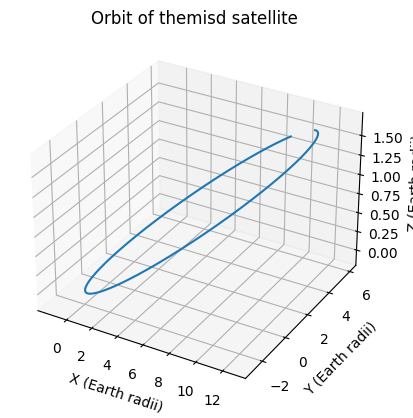

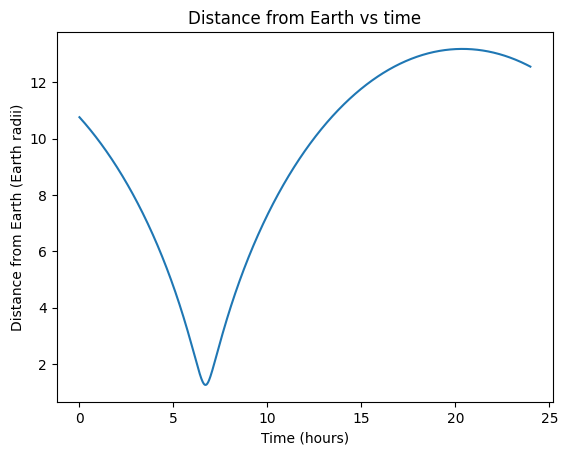

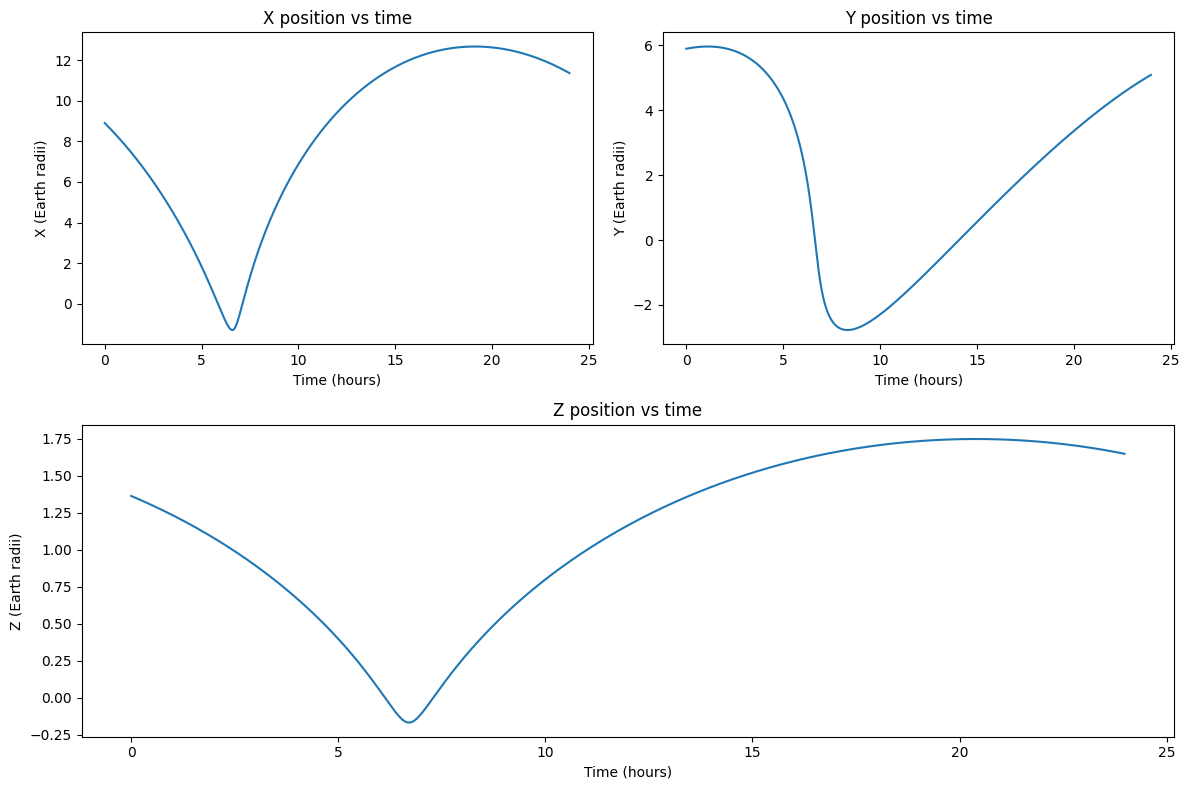

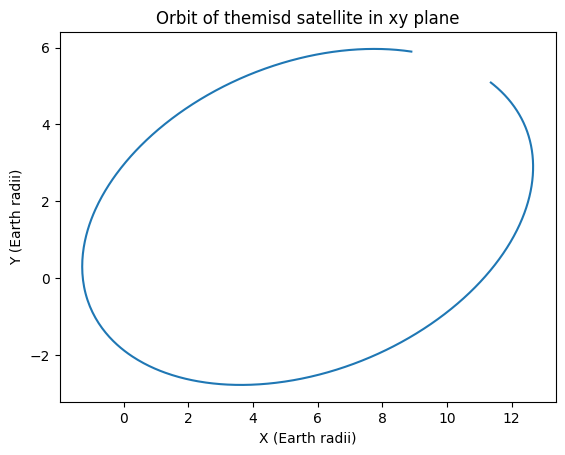

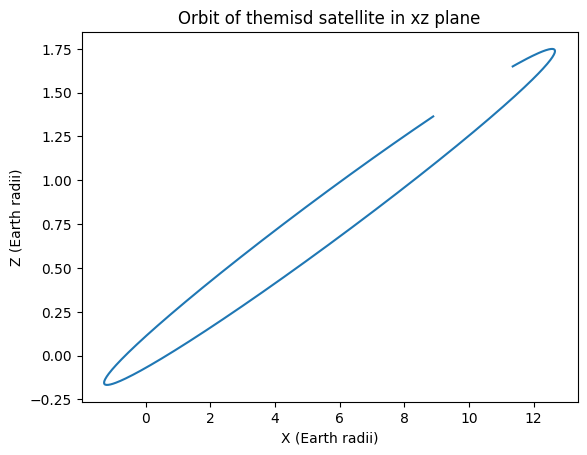

In [9]:
def orbit_3d_plot(t_series, x_series, y_series, z_series):
    '''
    Plot the orbit of the satellite in 3d space
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111,projection='3d')

    ax.plot(x_series, y_series, z_series)

    ax.set_xlabel('X (Earth radii)')
    ax.set_ylabel('Y (Earth radii)')
    ax.set_zlabel('Z (Earth radii)')
    ax.set_title('Orbit of {} satellite'.format(satellite_name))
    plt.show()


def distance_from_earth(x_series, y_series, z_series, t_series):
    '''
    Calculate the distance of the satellite from the center of the earth at each time step
    '''
    # initialize empty array for distance data
    r_series = np.array([])

    # loop through each time step and calculate distance from earth
    for i in range(len(t_series)):
        r = np.sqrt(x_series[i]**2 + y_series[i]**2 + z_series[i]**2)
        r_series = np.append(r_series, r)

    return r_series

def plot_distance_from_earth(r_series, t_series):
    '''
    Plot the distance of the satellite from the center of the earth as a function of time
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(t_series, r_series)
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Distance from Earth (Earth radii)')
    ax.set_title('Distance from Earth vs time')
    plt.show()


def orbit_2d_plots(t_series, x_series, y_series, z_series):
    '''
    Plot the orbit of the satellite in 2d space
    '''
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(212)


    ax1.plot(t_series, x_series)
    ax1.set_xlabel('Time (hours)')
    ax1.set_ylabel('X (Earth radii)')
    ax1.set_title('X position vs time')

    ax2.plot(t_series, y_series)
    ax2.set_xlabel('Time (hours)')
    ax2.set_ylabel('Y (Earth radii)')
    ax2.set_title('Y position vs time')

    ax3.plot(t_series, z_series)
    ax3.set_xlabel('Time (hours)')
    ax3.set_ylabel('Z (Earth radii)')
    ax3.set_title('Z position vs time')

    plt.tight_layout()
    plt.show()


# plot the orbit as a function of position in the xy plane:

def orbit_xy_plot(x_series, y_series):
    '''
    Plot the orbit of the satellite in the xy plane
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x_series, y_series)
    ax.set_xlabel('X (Earth radii)')
    ax.set_ylabel('Y (Earth radii)')
    ax.set_title('Orbit of {} satellite in xy plane'.format(satellite_name))
    plt.show()




# plot the orbit as a function of position in the xz plane:

def orbit_xz_plot(x_series, z_series):
    '''
    Plot the orbit of the satellite in the xz plane
    '''
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(x_series, z_series)
    ax.set_xlabel('X (Earth radii)')
    ax.set_ylabel('Z (Earth radii)')
    ax.set_title('Orbit of {} satellite in xz plane'.format(satellite_name))
    plt.show()



orbit_3d_plot(t_series, x_series, y_series, z_series)

plot_distance_from_earth(distance_from_earth(x_series, y_series, z_series, t_series), t_series)

orbit_2d_plots(t_series, x_series, y_series, z_series)

orbit_xy_plot(x_series, y_series)

orbit_xz_plot(x_series, z_series)

You must include a comment about your results. The comment should walk a reader through what you see in your plots. Don't assume your reader sees anything of value in your plots; **tell them** what they should see. For example, this question asks you to plot a satellite orbit. Walk your reader through some of the features you see in the orbit. (Roughly when does perigee and apogee occur? Roughly what is the perigee and apogee distance? What shape is the orbit?) State why or why not you think your plot looks like a plausible satellite orbit. Don't assume the reader sees any of that immediately.

**Rubric for questions:** Start with 5 points total. Points are deducted as follows until 0.
- graphing: proper axis labels, titles, legends, uncluttered, etc.
    - one minor: -1/2
    - multiple: -1
- code commenting: docstrings and inline comments
    - missing one: -1/2
    - missing many: -1
- duplicated code that should be in functions
    - several repeated blocks of multiple lines: -1/2
    - no attempt to remove many redundancies: -1
- comments on results:
    - missing: -2
    - inadequate: -1
- numerical/calculation/conceptual errors
    - one minor: -1
    - multiple minor or one major -2
    - multiple major: -2 or -3.




-------------------


## Question 2

 How closely does the data from question 1 demonstrate conservation of energy (gravitational potential+kinetic energy per unit mass)? Assume a simple $1/r$ gravitational potential for the Earth. Use a forward finite difference scheme when computing the kinetic energy. You may drop the edge points. Be careful of the sign on the potential.

   a. Plot the kinetic energy per unit mass, the potential energy per unit mass, and their sum (the total energy per unit mass) on the same plot as a function of time.

   b. Plot just the total energy per unit mass (KE+PE) on its own plot. 

   c. Comment on your plots. Do they demonstrate conservation of energy? If not, what do you think the problem might be?

In [14]:
def q2_plots(time,position):
    '''
    Create the plots required for question 2: kinetic and potential energy per unit mass.
    '''
    # Calculate the velocity, speed (in m/s) and kinetic energy

    

q2_plots(time,position)


Include your comments here. What did you plot? Does it demonstrate conservation of energy? Why or why not? If not, what happened?

Question 2 is also worth 5 points, using the same rubric.

---------

## Question 3

 Repeat question 2 using 3-point, 5-point and 7-point central finite difference estimators to compute the kinetic energy.

In [15]:
def q3_plots(time,position):
    '''
    Create the plots required for question 3: total energy using 3,5 and 7-point stencils.
    '''

q3_plots(time,position)


Include your comments here. What did you plot? Does it demonstrate conservation of energy? Why or why not? If not, what happened?

Question 3 is also worth 5 points, using the same rubric.

---------

## Question 4

The Earth is not exactly spherical (mostly because it rotates), and the gravitational potential is therefore not strictly the same as for a point mass (a monopole). A more accurate representation for the Earth's gravitational potential is

$$\phi=-\frac{\mu}{r}+\frac{J_2}{2r^5}(3 z^2-r^2)$$

with $\mu=3.98600440 \times 10^{14}  {\rm m^3/s^2}$, $J_2=1.75553 \times 10^{25} {\rm m^5/s^2}$, $r$ the radial distance and $z$ the distance above the equator (z in the GEI system). How well is energy conserved using this more accurate model for the gravitational potential and a 7-point stencil for the kinetic energy?

In [16]:
def q4_plots(time,position):
    '''
    Create the plots required for question 4: total energy with a 7-point stencil and a 2-term gravitational field model.
    '''
q4_plots(time,position)

Include your comments here. What did you plot? Does it demonstrate conservation of energy? Why or why not? If not, what happened?

Question 4 is also worth 5 points, using the same rubric.

---------

## Conclusions

What did you do? How does it all fit together? What was the point of the assignment? Did it show anything important about computational methods? Did you learn anything?

**Rubric:**
- 2 points total for the conclusion.
- Completely missing: 0 points
- Inadequate/problematic: 1 point (eg. “In this assignment I answered the questions”)

